In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

In [2]:
import platform
system_name = platform.system()
print(system_name)
if system_name == "Windows":
    font_family = "Malgun Gothic"
plt.rc("font", family=font_family)

Windows


In [3]:
plt.rc("axes", unicode_minus=False)

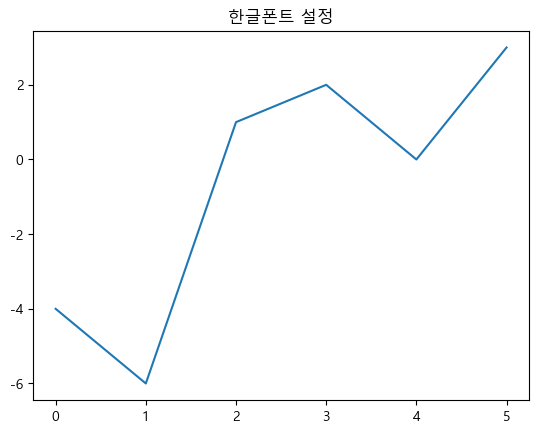

In [4]:
# 한글폰트와 마이너스 폰트 설정 확인
plt.title("한글폰트 설정")
plt.plot([-4, -6, 1, 2, 0, 3])

#### 데이터 불러오기

In [6]:
df = pd.read_csv("DATA/소상공인시장진흥공단_상가(상권)정보_대구_202403.csv", encoding='utf-8', low_memory=False)
df_raw_data = df.copy()
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0003881,엉클몽키테니스,NaN,R1,예술·스포츠,R103,스포츠 서비스,R10312,테니스장,R91199,...,2729011500114450004013792,NaN,대구광역시 달서구 상원로11길 36,704817,42790,NaN,2,NaN,128.535589,35.813599
1,MA0101202210A0090318,아보카,NaN,I2,음식,I203,일식,I20301,일식 회/초밥,I56122,...,2729011600110100000000001,NaN,대구광역시 달서구 수밭동길 34,704802,42835,NaN,1,NaN,128.549749,35.795445
2,MA0101202210A0101134,무아브로우,NaN,S2,수리·개인,S207,이용·미용,S20702,피부 관리실,S96113,...,2711015600109170008015104,NaN,대구광역시 중구 명륜로23길 57,700802,41957,NaN,NaN,NaN,128.595289,35.862512


In [7]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

#### 데이터 크기

In [8]:
df.shape

(109950, 39)

#### info보기

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109950 entries, 0 to 109949
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     109950 non-null  object 
 1   상호명        109950 non-null  object 
 2   지점명        1857 non-null    object 
 3   상권업종대분류코드  109950 non-null  object 
 4   상권업종대분류명   109950 non-null  object 
 5   상권업종중분류코드  109950 non-null  object 
 6   상권업종중분류명   109950 non-null  object 
 7   상권업종소분류코드  109950 non-null  object 
 8   상권업종소분류명   109950 non-null  object 
 9   표준산업분류코드   109933 non-null  object 
 10  표준산업분류명    109933 non-null  object 
 11  시도코드       109950 non-null  int64  
 12  시도명        109950 non-null  object 
 13  시군구코드      109950 non-null  int64  
 14  시군구명       109950 non-null  object 
 15  행정동코드      109950 non-null  int64  
 16  행정동명       109950 non-null  object 
 17  법정동코드      109950 non-null  int64  
 18  법정동명       109950 non-null  object 
 19  지번코드       109950 non-n

#### 결측치 보기

<Axes: >

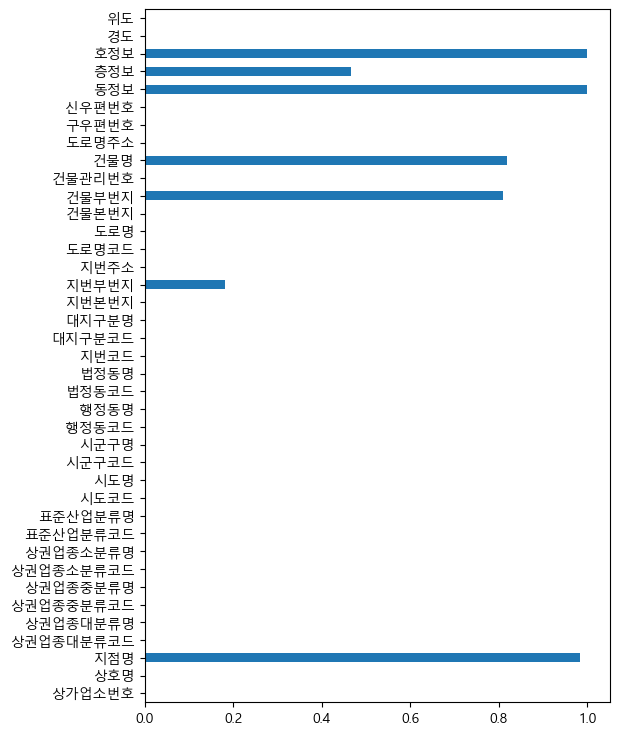

In [12]:
df.isnull().mean().plot.barh(figsize=(6, 9))

#### 사용하지 않는 컬럼 제거

In [13]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [15]:
# 사용하는 컬럼으로 지정도 가능
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', '경도', '위도']
print(df.shape)
df = df[columns].copy()
print(df.shape)

(109950, 39)
(109950, 11)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109950 entries, 0 to 109949
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       109950 non-null  object 
 1   상권업종대분류명  109950 non-null  object 
 2   상권업종중분류명  109950 non-null  object 
 3   상권업종소분류명  109950 non-null  object 
 4   시도명       109950 non-null  object 
 5   시군구명      109950 non-null  object 
 6   행정동명      109950 non-null  object 
 7   법정동명      109950 non-null  object 
 8   도로명주소     109950 non-null  object 
 9   경도        109950 non-null  float64
 10  위도        109950 non-null  float64
dtypes: float64(2), object(9)
memory usage: 9.2+ MB


In [17]:
df['시군구명'].unique()

array(['달서구', '중구', '북구', '동구', '달성군', '수성구', '군위군', '남구', '서구'],
      dtype=object)

In [18]:
df_daegu = df.copy()

#### 상권업종대분류명 가운데 '음식' 항목 추출

In [19]:
df_food = df_daegu[df_daegu["상권업종대분류명"]=='음식'].copy()
print(f'(상권업종대분류명=음식)의 수 : {len(df_food)}')
df_food.head()

(상권업종대분류명=음식)의 수 : 36616


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
1,아보카,음식,일식,일식 회/초밥,대구광역시,달서구,도원동,도원동,대구광역시 달서구 수밭동길 34,128.549749,35.795445
3,홍천뚝배기,음식,한식,국/탕/찌개류,대구광역시,북구,산격3동,산격동,대구광역시 북구 대동로6길 28,128.609366,35.894844
4,오느른케이크,음식,기타 간이,빵/도넛,대구광역시,달서구,진천동,진천동,대구광역시 달서구 진천로9길 78-1,128.520585,35.812114
9,자담치킨,음식,기타 간이,치킨,대구광역시,북구,동천동,동천동,대구광역시 북구 동천로 35-10,128.558141,35.935202
10,샐러드SLB,음식,기타 간이,피자,대구광역시,수성구,고산3동,신매동,대구광역시 수성구 달구벌대로645길 11,128.709802,35.840250


#### 상권업종대분류명 == 음식 인 항목가운데 중분류명 항목보기

In [22]:
df_food['상권업종중분류명'].unique()

array(['일식', '한식', '기타 간이', '중식', '주점', '구내식당·뷔페', '비알코올 ', '서양식',
       '동남아시아', '기타 외국'], dtype=object)

In [24]:
# 비알코올 공백 있음 
df_non_alcohol = df_food[df_food["상권업종중분류명"]=='비알코올 '].copy()
df_non_alcohol.shape

(5298, 11)

#### 상권업종중분류명 == '비알코올 '  항목보기

In [28]:
df_non_alcohol["상권업종소분류명"].unique()

array(['카페'], dtype=object)

In [29]:
df_non_alcohol.shape

(5298, 11)

#### 상권업종소분류명 == '카페'  항목보기 + 상권업종소분류명 == '독서실/스터디 카페'

In [30]:
df_cafe = df_non_alcohol[df_non_alcohol["상권업종소분류명"]=='카페'].copy()
df_cafe.shape

(5298, 11)

#### 파일로 저장

In [31]:
df_cafe.to_csv('DATA/daegu_cafe_info.csv', encoding='utf-8')

#### 커피 프랜차이즈 가운데 숫자가 많은 항목 5개 추출

In [33]:
df_cafe["상호명"].value_counts().head(40)

상호명
몬스터커피        37
카페봄봄         32
봄봄           28
청솔로9         24
하삼동커피        16
공차대구         16
투썸플레이스대구     14
마시그래이        14
더리터          13
더벤티          13
레프트뱅크        13
매스커피         13
투썸플레이스       12
핸즈커피         12
이디야커피대구      12
카페           11
컴포즈커피        11
플랜           10
파스쿠찌대구        9
커피명가          8
구공카페          8
컴포즈커피대구       8
몰타            8
마실커피          8
메가엠지씨커피대구     8
빽다방대구         8
캔버스           7
텐퍼센트커피        7
이디야커피         7
공차            7
읍천리382        7
팔공티           7
나우커피대구        6
일리터맥스         6
리터킹           5
카페꽃이피다        5
텐퍼센트          5
카페인           5
커피에반하다        5
카페달달          5
Name: count, dtype: int64

#### 키워드 추출
- 몬스터커피 37
- 봄봄(카페봄봄) 64
- 청솔로9 25
- 공차(공차대구) 17
- 빽다방(빽다방대구)
- 하삼동(하삼동커피)
- 투썸플레이스
- 마시그래이
- 레프트뱅크
- 더밴티
- 컴포즈        12
- 이디야커피      12
- 핸즈커피         12
- 텐퍼센트        7
- 팔공티

#### 커피 프랜차이즈 정보 추출

In [69]:
cafe_name = ['몬스터커피','봄봄','청솔로9','공차','빽다방','하삼동',
             '투썸플레이스','마시그래이','레프트뱅크',
             '컴포즈','이디야','핸즈커피','텐퍼센트','팔공티']
cafe_name_fix = ['몬스터커피','카페봄봄','청솔로9커피','공차','빽다방','하삼동커피',
             '투썸플레이스','마시그래이커피','레프트뱅크',
             '컴포즈커피','이디야커피','핸즈커피','텐퍼센트커피','팔공티']

for i,name in enumerate(cafe_name):
    df_cafe.loc[df_cafe['상호명'].str.contains(name), '브랜드명'] = cafe_name_fix[i]
df_cafe.head(3)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,표준산업분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
3,카페사람이야기,음식,비알코올,카페,커피 전문점,대구광역시,동구,혁신동,각산동,대구광역시 동구 이노밸리로46길 4-9,128.721839,35.877366,NaN
4,다즐링,음식,비알코올,카페,커피 전문점,대구광역시,동구,신천4동,신천동,대구광역시 동구 화랑로 23,128.631047,35.868657,NaN
22,아더와이즈,음식,비알코올,카페,커피 전문점,대구광역시,달서구,두류3동,두류동,대구광역시 달서구 당산로38길 13,128.549264,35.853493,NaN


In [70]:
df_cafe['브랜드명'].value_counts()

브랜드명
카페봄봄       136
이디야커피       98
투썸플레이스      86
몬스터커피       65
빽다방         63
공차          48
청솔로9커피      45
컴포즈커피       44
마시그래이커피     39
하삼동커피       35
핸즈커피        34
텐퍼센트커피      33
레프트뱅크       24
팔공티         15
더밴티커피        1
Name: count, dtype: int64

In [34]:
name = '팔공티'
df_cafe['상호명'].str.contains(name).value_counts()

상호명
False    5283
True       15
Name: count, dtype: int64

In [35]:
df_cafe = df[df["상권업종소분류명"].isin(['카페','독서실/스터디 카페'])].copy()
cafe_name = ['몬스터커피','봄봄','청솔로9','하삼동','공차','투썸플레이스','마시그래이',
             '마시그레이','더리터','더밴티','더벤티','레프트뱅크','매스커피','핸즈커피',
             '이디야','컴포즈','플랜','파스쿠찌','커피명가','마실커피','메가엠지씨',
             '메가커피','빽다방','캔버스','텐퍼센트','읍천리','팔공티','나우커피','카페인중독']

cafe_name_fix = ['몬스터커피','카페봄봄','청솔로9커피','하삼동커피','공차','투썸플레이스','마시그래이커피',
                 '마시그래이커피','더리터커피','더벤티커피','더벤티커피','레프트뱅크커피','매스커피',
                 '핸즈커피','이디야커피','컴포즈커피','플랜커피','파스쿠찌','커피명가','마실커피','메가커피',
                 '메가커피','빽다방','카페캔버스','텐퍼센트커피','읍천리382커피','팔공티','나우커피','카페인중독']

for i,name in enumerate(cafe_name):
    df_cafe.loc[df_cafe['상호명'].str.contains(name), '브랜드명'] = cafe_name_fix[i]
df_cafe['브랜드명'].value_counts()

브랜드명
nan         4697
카페봄봄         132
이디야커피         95
투썸플레이스        84
몬스터커피         65
빽다방           63
더리터커피         63
공차            45
청솔로9커피        44
메가커피          42
더벤티커피         41
컴포즈커피         40
파스쿠찌          38
마시그래이커피       37
하삼동커피         35
핸즈커피          33
텐퍼센트커피        33
매스커피          32
커피명가          27
플랜커피          23
마실커피          23
레프트뱅크커피       22
나우커피          18
카페캔버스         16
팔공티           15
읍천리382커피      15
카페인중독         13
Name: count, dtype: int64

In [36]:
name = '봄봄|카페봄봄'
df_cafe['상호명'].str.contains(name).value_counts()

상호명
False    5659
True      132
Name: count, dtype: int64

In [38]:
df_cafe = df[df["상권업종소분류명"].isin(['카페','독서실/스터디 카페'])].copy()
cafe_name = ['몬스터커피','봄봄|카페봄봄','청솔로9','하삼동','공차','투썸플레이스',
             '마시그래이|마시그레이','더리터|더리터커피','더밴티','더벤티','레프트뱅크','매스커피','핸즈커피',
             '이디야','컴포즈','플랜','파스쿠찌','커피명가','마실커피','메가엠지씨|메가커피',
             '빽다방','캔버스','텐퍼센트','읍천리|읍천리382','팔공티','나우커피','카페인중독']

cafe_name_fix = ['몬스터커피','카페봄봄','청솔로9커피','하삼동커피','공차','투썸플레이스','마시그래이커피',
                 '더리터커피','더벤티커피','더벤티커피','레프트뱅크커피','매스커피',
                 '핸즈커피','이디야커피','컴포즈커피','플랜커피','파스쿠찌','커피명가','마실커피',
                 '메가커피','빽다방','카페캔버스','텐퍼센트커피','읍천리382커피','팔공티','나우커피','카페인중독']

for i,name in enumerate(cafe_name):
    df_cafe.loc[df_cafe['상호명'].str.contains(name), '브랜드명'] = cafe_name_fix[i]
df_cafe['브랜드명'].value_counts()


브랜드명
nan         4697
카페봄봄         132
이디야커피         95
투썸플레이스        84
몬스터커피         65
빽다방           63
더리터커피         63
공차            45
청솔로9커피        44
메가커피          42
더벤티커피         41
컴포즈커피         40
파스쿠찌          38
마시그래이커피       37
하삼동커피         35
핸즈커피          33
텐퍼센트커피        33
매스커피          32
커피명가          27
플랜커피          23
마실커피          23
레프트뱅크커피       22
나우커피          18
카페캔버스         16
팔공티           15
읍천리382커피      15
카페인중독         13
Name: count, dtype: int64

#### 지점수 많은 6개 항목만 추출

In [40]:
search_key = '봄봄|이디야|투썸플레이스|몬스터커피|빽다방|더리터'
df_coffee = df_cafe.loc[df_cafe['상호명'].str.contains(search_key)].copy()

#### 지점수 순으로 정렬

In [41]:
for i in df_coffee.index:
    df_coffee.loc[i,'브랜드지점수'] = df_coffee['브랜드명'].value_counts()[df_coffee.loc[i,'브랜드명']]
# 지점수 많은 순으로 정렬
df_coffee_sorted = df_coffee.sort_values(by='브랜드지점수', axis=0, ascending=False)
df_coffee_sorted.head(3)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명,브랜드지점수
456,카페봄봄테크노폴리스,음식,비알코올,카페,대구광역시,달성군,유가읍,유가읍,대구광역시 달성군 유가읍 테크노상업로 112,128.461935,35.693259,카페봄봄,132.0
72371,카페봄봄학정점,음식,비알코올,카페,대구광역시,북구,국우동,학정동,대구광역시 북구 학정로 533,128.565023,35.952304,카페봄봄,132.0
64947,카페봄봄,음식,비알코올,카페,대구광역시,중구,대신동,대신동,대구광역시 중구 큰장로26길 65,128.581728,35.868969,카페봄봄,132.0


#### 각 구별 브랜드 수 구하기

In [42]:
table_brand = df_coffee_sorted.pivot_table(index="시군구명",columns='브랜드명',
                                values="상호명", aggfunc="count", fill_value=0)
table_brand

브랜드명,더리터커피,몬스터커피,빽다방,이디야커피,카페봄봄,투썸플레이스
시군구명,,,,,,
군위군,0,0,0,1,1,1
남구,2,3,0,4,11,3
달서구,12,12,15,20,28,16
달성군,5,6,4,13,13,10
동구,14,5,10,7,15,12
북구,11,13,13,15,20,11
서구,1,6,3,2,6,2
수성구,12,11,8,20,25,17
중구,6,9,10,13,13,12


#### 구별 브랜드 수 bar그래프로 표시

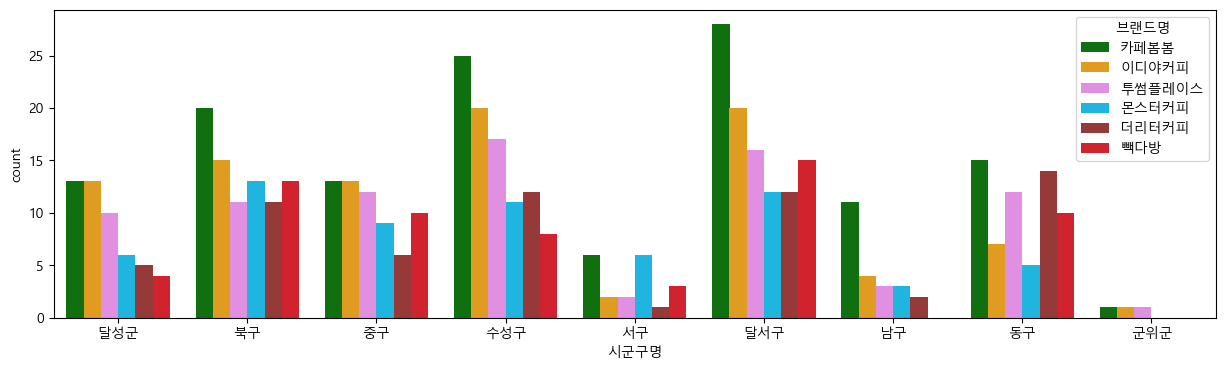

In [46]:
color_dict = {'몬스터커피':'#00C7FF',  '빽다방':'#EE0613', '이디야커피':'orange', 
              '카페봄봄':'green', '투썸플레이스':'violet','더리터커피':'brown'}
plt.figure(figsize=(15,4))
g = sns.countplot(data=df_coffee_sorted, x="시군구명", hue='브랜드명', palette=color_dict)

#### 지도에 다른 색깔로 지점위치 표시(브랜드명-도로명주소 라벨)

In [104]:
!pip install folium

In [49]:
import folium

lat = df_coffee_sorted['위도'].mean()
long = df_coffee_sorted['경도'].mean()

m = folium.Map(location=[lat,long], zoom_start=12, height=800)

for i in df_coffee.index:
    row = df_coffee.loc[i]
    i_lat = row['위도']
    i_long = row['경도']
    label = row['브랜드명']+' - '+row['도로명주소'][6:] # 도로명 주소앞 '대구광역시 ' 생략
    color = color_dict[row['브랜드명']]
    popup = folium.Popup(label, max_width=150)
    folium.CircleMarker(
        location = [i_lat, i_long],
        radius = 3,
        color = color,
        fill = False,
        fill_opacity = 1, 
        fill_color = color,
        popup = popup
    ).add_to(m)
m